In [ ]:
pip install networkx matplotlib

In [74]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

def read_csv_file(csv_file):
    edges = []
    with open(csv_file, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row (source , target)
        for row in csv_reader:
            source = row[0]
            target = row[1]
            edges.append((source, target))
    return edges

def find_and_visualize_loops(csv_file):
    edges = read_csv_file(csv_file)

    # Create a graph from the list of edges
    G = nx.Graph(edges)

    # Find all simple cycles (loops) in the graph
    cycles = list(nx.simple_cycles(G))

    # Visualization
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='pink', font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    loop_edges = [(u, v) for cycle in cycles for u, v in zip(cycle, cycle[1:] + cycle[:1])]
    nx.draw_networkx_edges(G, pos, edgelist=loop_edges, edge_color='green', width=2)
    plt.title('Graph with Loops')
    plt.axis('off')
    plt.savefig('graph_with_loops.png')
    plt.show()


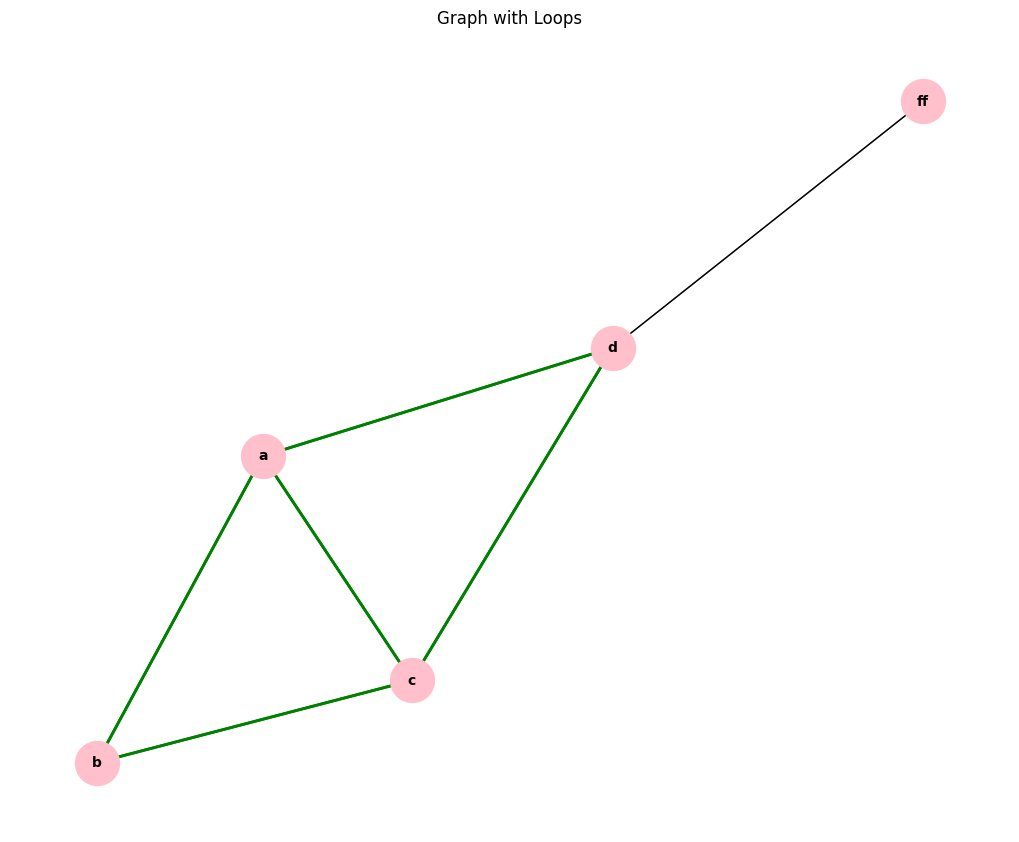

In [75]:
find_and_visualize_loops("/content/input.csv")